In [58]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import yfinance as yf

In [59]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies

In [60]:
# This is used to download BTC data from AlphaVantage

crypt = CryptoCurrencies('WQ8W67GO6PP73AD4', output_format = 'pandas')

In [61]:
btc_av = crypt.get_digital_currency_daily('BTC', market='USD')[0]

In [62]:
btc_av = pd.DataFrame(btc_av)

In [63]:
btc_av

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2021-03-22,57351.56,57351.56,57449.47,57449.47,57000.00,57000.00,57187.95,57187.95,1276.495931,1276.495931
2021-03-21,58100.02,58100.02,58589.10,58589.10,55450.11,55450.11,57351.56,57351.56,48564.470274,48564.470274
2021-03-20,58030.01,58030.01,59880.00,59880.00,57820.17,57820.17,58102.28,58102.28,44476.941776,44476.941776
2021-03-19,57641.00,57641.00,59468.00,59468.00,56270.74,56270.74,58030.01,58030.01,52392.652961,52392.652961
2021-03-18,58912.97,58912.97,60129.97,60129.97,57023.00,57023.00,57648.16,57648.16,66580.406675,66580.406675
...,...,...,...,...,...,...,...,...,...,...
2018-07-01,6391.08,6391.08,6441.06,6441.06,6251.00,6251.00,6356.81,6356.81,27562.965974,27562.965974
2018-06-30,6197.92,6197.92,6528.99,6528.99,6186.03,6186.03,6390.07,6390.07,37919.612840,37919.612840
2018-06-29,5851.01,5851.01,6300.00,6300.00,5780.00,5780.00,6197.92,6197.92,33911.287278,33911.287278


Initial exploration suggests that the API only provides data for a time period of 3 years. To supplement this, additional data has to be obtained. Apart from that, there seems to be columns of repeated values. 

In [64]:
btc_av = btc_av[['1a. open (USD)', '2a. high (USD)', '3a. low (USD)', '4a. close (USD)', '5. volume']]

In [65]:
btc_av

,1a. open (USD),2a. high (USD),3a. low (USD),4a. close (USD),5. volume
date,,,,,
2021-03-22,57351.56,57449.47,57000.00,57187.95,1276.495931
2021-03-21,58100.02,58589.10,55450.11,57351.56,48564.470274
2021-03-20,58030.01,59880.00,57820.17,58102.28,44476.941776
2021-03-19,57641.00,59468.00,56270.74,58030.01,52392.652961
2021-03-18,58912.97,60129.97,57023.00,57648.16,66580.406675
...,...,...,...,...,...
2018-07-01,6391.08,6441.06,6251.00,6356.81,27562.965974
2018-06-30,6197.92,6528.99,6186.03,6390.07,37919.612840
2018-06-29,5851.01,6300.00,5780.00,6197.92,33911.287278


In [66]:
# changing name of columns 

btc_av.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

In [67]:
btc_av.index.names = ['Date']
btc_av

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-22,57351.56,57449.47,57000.00,57187.95,1276.495931
2021-03-21,58100.02,58589.10,55450.11,57351.56,48564.470274
2021-03-20,58030.01,59880.00,57820.17,58102.28,44476.941776
2021-03-19,57641.00,59468.00,56270.74,58030.01,52392.652961
2021-03-18,58912.97,60129.97,57023.00,57648.16,66580.406675
...,...,...,...,...,...
2018-07-01,6391.08,6441.06,6251.00,6356.81,27562.965974
2018-06-30,6197.92,6528.99,6186.03,6390.07,37919.612840
2018-06-29,5851.01,6300.00,5780.00,6197.92,33911.287278


In [68]:
# Gathering data using yahoo finance api till the first date provided by alpha vantage
btc_yf = yf.download('BTC-USD', end='2018-06-26')

[*********************100%***********************]  1 of 1 completed


In [69]:
btc_yf

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2018-06-21,6780.089844,6810.939941,6715.169922,6729.740234,6729.740234,3529129984
2018-06-22,6737.879883,6747.080078,6006.600098,6083.689941,6083.689941,5079810048
2018-06-23,6090.100098,6224.819824,6071.810059,6162.479980,6162.479980,3431360000


In [70]:
# Dropping 'Adj Close' 

btc_yf = btc_yf.drop(['Adj Close'], axis = 1)

Combining the dataframes taken from alpha vantage and yahoo finance 

The first observation is the sequence of dates in both the dataframes is opposite of each other. The combination can be done as follows:
- Change the sequence of dates in the alpha vantage dataframe
- Append the columns to the yahoo finance data frame 

In [71]:
# Reversing the dataframe for alpha vantage 

btc_av = btc_av.iloc[::-1]

In [72]:
btc_av

,Open,High,Low,Close,Volume
Date,,,,,
2018-06-27,6065.89,6190.43,5971.00,6133.73,19225.671098
2018-06-28,6134.73,6173.01,5827.00,5853.98,30585.266026
2018-06-29,5851.01,6300.00,5780.00,6197.92,33911.287278
2018-06-30,6197.92,6528.99,6186.03,6390.07,37919.612840
2018-07-01,6391.08,6441.06,6251.00,6356.81,27562.965974
...,...,...,...,...,...
2021-03-18,58912.97,60129.97,57023.00,57648.16,66580.406675
2021-03-19,57641.00,59468.00,56270.74,58030.01,52392.652961
2021-03-20,58030.01,59880.00,57820.17,58102.28,44476.941776


In [73]:
# Concatanating dataframes 

BTC = pd.concat([btc_yf, btc_av])

In [74]:
BTC

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,2.105680e+07
2014-09-18,456.859985,456.859985,413.104004,424.440002,3.448320e+07
2014-09-19,424.102997,427.834991,384.532013,394.795990,3.791970e+07
2014-09-20,394.673004,423.295990,389.882996,408.903992,3.686360e+07
2014-09-21,408.084991,412.425995,393.181000,398.821014,2.658010e+07
...,...,...,...,...,...
2021-03-18,58912.970000,60129.970000,57023.000000,57648.160000,6.658041e+04
2021-03-19,57641.000000,59468.000000,56270.740000,58030.010000,5.239265e+04
2021-03-20,58030.010000,59880.000000,57820.170000,58102.280000,4.447694e+04


The dataframe, BTC, now conatins data about bitcoin prices and volume from 17/9/14 till 22/03/21

The data for all the other factors can now be collected using the yahoo finance api. This has to be done between the dates that were used for the BTC dataframe.  
The data will be collected for: 
- S&P500 index ('GSPC') 
- Dow Jones Industrial Average ('DJI')
- NASDAQ Composite ('IXIC')
- NYSE COMPOSITE ('NYSE')
- NYSE AMEX COMPOSITE INDEX ('XAX')
- Cboe UK 100 ('BUK100P)
- FTSE ('FTSE')
- EURONEXT ('N100')
- Nikkei ('N225')
- S&P BSE SENSEX ('BSESN')
- HANG SENG INDEX ('HSI')
- S&P/ASX 200 ('AXJO') 
- SSE Composite Index ('000001.SS')
- Shenzhen Component ('399001.SZ')
- Jakarta Composite Index ('JKSE')

In [101]:
indices = yf.download(['^GSPC','^DJI','^IXIC','^NYA','^XAX','^BUK100P','^FTSE','^N100','^N225','^BSESN','^HSI','^AXJO','^JKSE'], 
                      start='2014-09-17', end='2021-03-22')

[*********************100%***********************]  13 of 13 completed


In [102]:
indices = indices['Close']

In [103]:
combined = pd.concat([BTC['Close'],indices], join='inner', axis=1)

In [104]:
combined

,Close,^AXJO,^BSESN,^BUK100P,^DJI,^FTSE,^GSPC,^HSI,^IXIC,^JKSE,^N100,^N225,^NYA,^XAX
Date,,,,,,,,,,,,,,
2014-09-17,457.334015,5407.299805,26631.289062,11519.370117,17156.849609,6780.899902,2001.569946,24376.410156,4562.189941,5188.184082,845.820007,15888.669922,10973.740234,2732.340088
2014-09-18,424.440002,5415.799805,27112.210938,11567.500000,17265.990234,6819.299805,2011.359985,24168.720703,4593.430176,5208.142090,852.450012,16067.570312,11024.059570,2738.239990
2014-09-19,394.795990,5433.100098,27090.419922,11612.169922,17279.740234,6837.899902,2010.400024,24306.160156,4579.790039,5227.582031,853.409973,16321.169922,10989.570312,2724.969971
2014-09-22,402.152008,5363.000000,27206.740234,11494.860352,17172.679688,6773.600098,1994.290039,23955.490234,4527.689941,5219.803223,849.659973,16205.900391,10892.639648,2683.159912
2014-09-23,435.790985,5415.700195,26775.689453,11333.660156,17055.869141,6676.100098,1982.770020,23837.070312,4508.689941,5188.113770,837.020020,NaN,10815.419922,2656.639893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,55605.200000,6773.000000,50395.078125,672.200012,32953.460938,6749.700195,3968.939941,28833.759766,13459.709961,6324.258789,1179.339966,29766.970703,15775.500000,2860.550049
2021-03-16,56900.750000,6827.100098,50363.960938,677.679993,32825.949219,6803.600098,3962.709961,29027.689453,13471.570312,6309.699219,1184.319946,29921.089844,15669.299805,2815.000000
2021-03-17,58912.970000,6795.200195,49801.621094,674.840027,33015.371094,6762.700195,3974.120117,29034.119141,13525.200195,6277.228027,1183.439941,29914.330078,15731.150391,2823.929932


<AxesSubplot:>

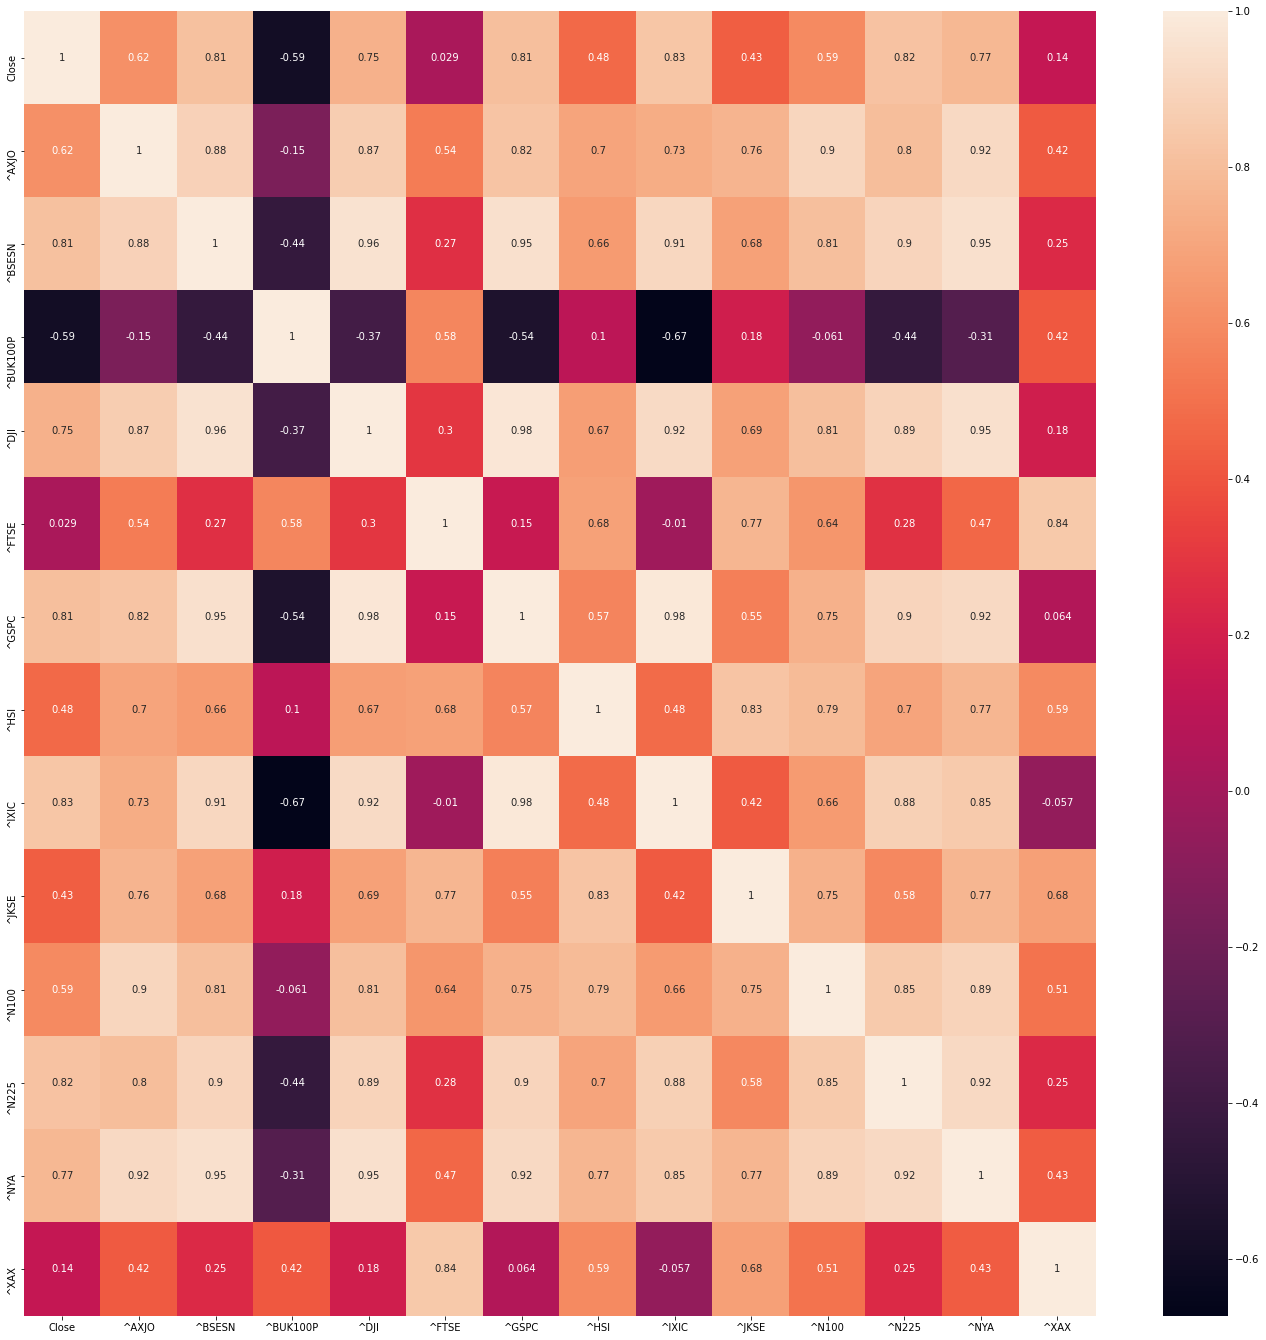

In [106]:
plt.figure(figsize = (24,24))
sb.heatmap(combined.corr(), annot = True)